### **1. Importing Data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/content/drive/MyDrive/Movies Correlations/movies.csv")
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


## **2. Data Exploration**

In [3]:
df.shape

(7668, 15)

In [4]:
df.isna().sum()

name           0
rating        77
genre          0
year           0
released       2
score          3
votes          3
director       0
writer         3
star           1
country        3
budget      2171
gross        189
company       17
runtime        4
dtype: int64

In [5]:
np.mean(df["budget"].isna())

0.2831246739697444

In [6]:
for column in df.columns :
  percentage_missing = np.mean(df[column].isna())
  print("column: {} - Percentage of missing: {}%".format(column,percentage_missing))


column: name - Percentage of missing: 0.0%
column: rating - Percentage of missing: 0.010041731872717789%
column: genre - Percentage of missing: 0.0%
column: year - Percentage of missing: 0.0%
column: released - Percentage of missing: 0.0002608242044861763%
column: score - Percentage of missing: 0.0003912363067292645%
column: votes - Percentage of missing: 0.0003912363067292645%
column: director - Percentage of missing: 0.0%
column: writer - Percentage of missing: 0.0003912363067292645%
column: star - Percentage of missing: 0.00013041210224308815%
column: country - Percentage of missing: 0.0003912363067292645%
column: budget - Percentage of missing: 0.2831246739697444%
column: gross - Percentage of missing: 0.02464788732394366%
column: company - Percentage of missing: 0.002217005738132499%
column: runtime - Percentage of missing: 0.0005216484089723526%


In [7]:
## 2247 with empty rows
df.isnull().any(axis=1).sum()


2247

In [8]:
df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

## **3.Cleaning Data**

A) Remove rows thats has null

In [9]:
df = df.dropna()
df.shape

(5421, 15)

 B) Fixing Data Realeased Format

In [10]:
df["released"].head()

0    June 13, 1980 (United States)
1     July 2, 1980 (United States)
2    June 20, 1980 (United States)
3     July 2, 1980 (United States)
4    July 25, 1980 (United States)
Name: released, dtype: object

In [11]:
df['Year'] = df['released'].str.extract(pat = '([0-9]{4})').astype(int)

In [12]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,1980


C) Fixing Datatypes


In [13]:
df["gross"] = df["gross"].astype("int64")
df["budget"] = df["budget"].astype("int64")

In [14]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


D) Visualize Data by Sorting by Gross

In [15]:
df.sort_values(by="gross",inplace=False,ascending=False).head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [16]:
pd.set_option("display.max_rows",None)

E) Number of Duplicate rows

In [17]:
import pandas as pd
num_duplicates = df.duplicated().sum()
print("Number of duplicate rows:", num_duplicates)

Number of duplicate rows: 0


In [18]:
df = df.drop("year",axis = 1)

## **4. Finding Data Correlation**

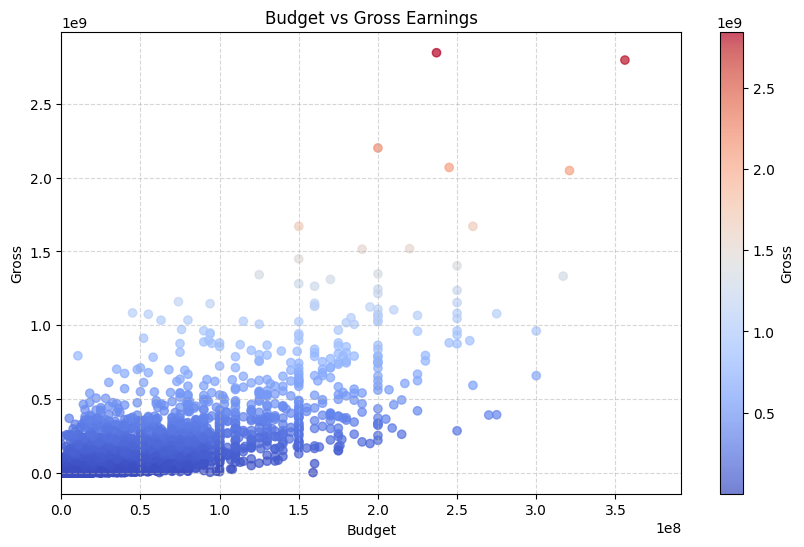

In [19]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame named 'df' containing the data

# Define the figure and axes
fig, ax = plt.subplots(figsize=(10, 6))

# Scatter plot
scatter = ax.scatter(x=df["budget"], y=df["gross"], c=df["gross"], cmap="coolwarm", alpha=0.7)

# Set labels and title
ax.set_title("Budget vs Gross Earnings")
ax.set_xlabel("Budget")
ax.set_ylabel("Gross")

# Set colorbar
cbar = plt.colorbar(scatter)
cbar.set_label("Gross")

# Adjust the plot limits
ax.set_xlim(left=0, right=df["budget"].max() * 1.1)  # Set the x-axis limits to 10% larger than the maximum budget value

# Add gridlines
ax.grid(True, linestyle='--', alpha=0.5)

# Show the plot
plt.show()

You can notice a linear relationship between them .. as the budget of a film increase the gross may increase

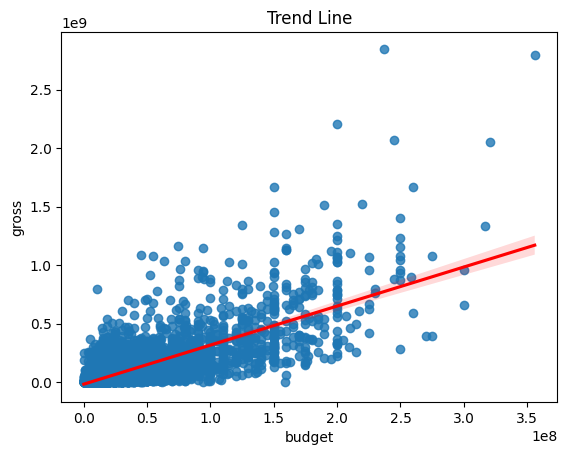

In [20]:
## Using Seaborn to get the trend line
plt.title("Trend Line")
sns.regplot(x="budget" , y="gross",data=df,line_kws={"color":"red"});


In [21]:
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
0,The Shining,R,Drama,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000,46998772,Warner Bros.,146.0,1980
1,The Blue Lagoon,R,Adventure,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000,58853106,Columbia Pictures,104.0,1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000,538375067,Lucasfilm,124.0,1980
3,Airplane!,PG,Comedy,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000,83453539,Paramount Pictures,88.0,1980
4,Caddyshack,R,Comedy,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000,39846344,Orion Pictures,98.0,1980


In [22]:
## Looking at correlation
df.corr() ## pearson (default) , kendal , spearman there is many type of correlation calculations

<ipython-input-22-0f8f02502df9>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr() ## pearson (default) , kendal , spearman there is many type of correlation calculations


,score,votes,budget,gross,runtime,Year
score,1.000000,0.474256,0.072001,0.222556,0.414068,0.061923
votes,0.474256,1.000000,0.439675,0.614751,0.352303,0.203098
budget,0.072001,0.439675,1.000000,0.740247,0.318695,0.320312
gross,0.222556,0.614751,0.740247,1.000000,0.275796,0.268721
runtime,0.414068,0.352303,0.318695,0.275796,1.000000,0.075294
Year,0.061923,0.203098,0.320312,0.268721,0.075294,1.000000


<ipython-input-23-1a49bc5b681e>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr(method="pearson")


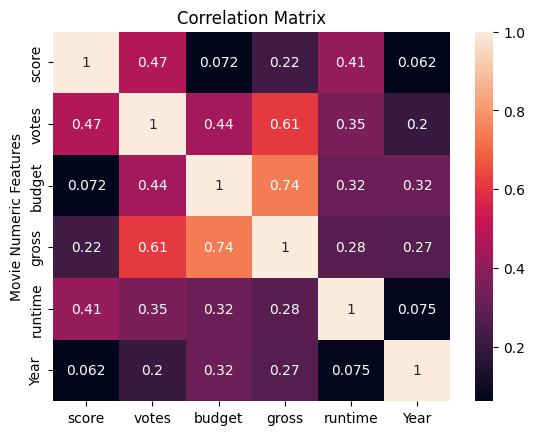

In [23]:
correlation_matrix = df.corr(method="pearson")
sns.heatmap(correlation_matrix,annot=True);
plt.title("Correlation Matrix");
plt.ylabel("Movie Numeric Features")
plt.show();

In [24]:
df = df.sort_values(by= "gross",ascending=False , inplace=False)

In [25]:
df.head()

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
5445,Avatar,PG-13,Action,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000,2847246203,Twentieth Century Fox,162.0,2009
7445,Avengers: Endgame,PG-13,Action,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000,2797501328,Marvel Studios,181.0,2019
3045,Titanic,PG-13,Drama,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000,2201647264,Twentieth Century Fox,194.0,1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000,2069521700,Lucasfilm,138.0,2015
7244,Avengers: Infinity War,PG-13,Action,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000,2048359754,Marvel Studios,149.0,2018


In [26]:
## Now you want  to numerize the others features to easy to manipulate on correlation matrix
## and also help you i want to to use a machine learning model on your data
df_numerize = df.copy()
for col in df_numerize.columns :
  if df_numerize[col].dtype == "object" :
   df_numerize[col]=df_numerize[col].astype("category")
   df_numerize[col] = df_numerize[col].cat.codes
df_numerize.head(10)

,name,rating,genre,released,score,votes,director,writer,star,country,budget,gross,company,runtime,Year
5445,386,5,0,527,7.8,1100000.0,785,1263,1534,47,237000000,2847246203,1382,162.0,2009
7445,388,5,0,137,8.4,903000.0,105,513,1470,47,356000000,2797501328,983,181.0,2019
3045,4909,5,6,534,7.8,1100000.0,785,1263,1073,47,200000000,2201647264,1382,194.0,1997
6663,3643,5,0,529,7.8,876000.0,768,1806,356,47,245000000,2069521700,945,138.0,2015
7244,389,5,0,145,8.4,897000.0,105,513,1470,47,321000000,2048359754,983,149.0,2018
7480,4388,4,2,1126,6.9,222000.0,1012,1361,457,47,260000000,1670727580,1423,118.0,2019
6653,2117,5,0,1303,7.0,593000.0,335,2523,293,47,150000000,1670516444,1397,124.0,2015
6043,3878,5,0,1899,8.0,1300000.0,1060,1646,1470,47,220000000,1518815515,983,143.0,2012
6646,1541,5,0,165,7.1,370000.0,809,481,1785,47,190000000,1515341399,1397,137.0,2015
7494,1530,4,2,2053,6.8,148000.0,277,1383,1036,47,150000000,1450026933,1422,103.0,2019


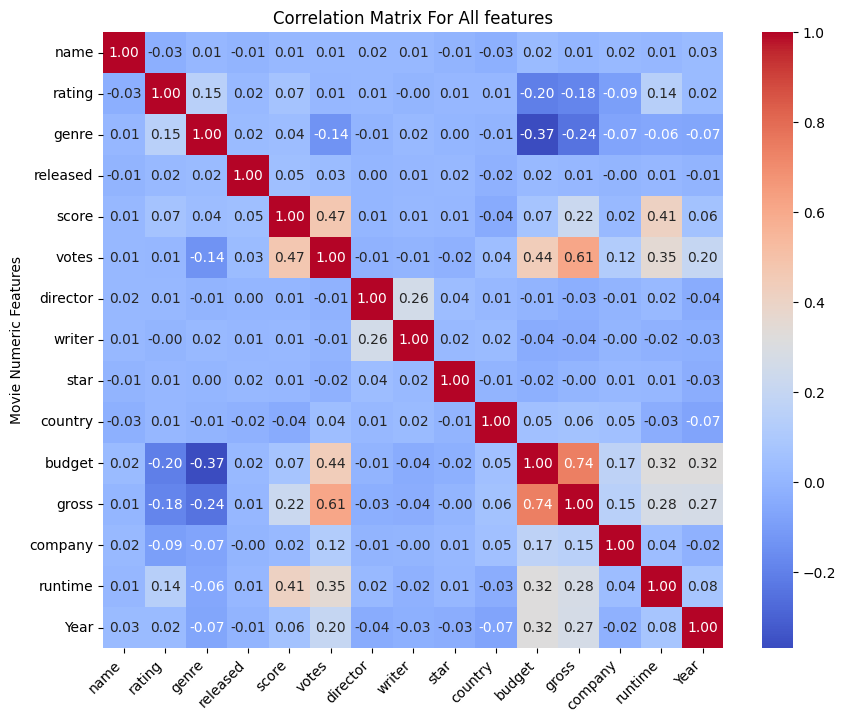

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have a DataFrame named 'df_numerize' containing the numerical features

# Compute correlation matrix
correlation_matrix = df_numerize.corr(method="pearson")

# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 8))

# Create heatmap
heatmap = sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", ax=ax)

# Rotate x-axis labels
heatmap.set_xticklabels(heatmap.get_xticklabels(), rotation=45, ha="right")

# Set title and labels
plt.title("Correlation Matrix For All features")
plt.ylabel("Movie Numeric Features")

# Show the plot
plt.show()

In [28]:
corr_pairs = correlation_matrix.unstack()
corr_pairs = corr_pairs.sort_values(ascending=False)
corr_pairs
## We can see that gross and budget have the strongest correlation between them all
## comes in the second place votes and gross

name      name        1.000000
rating    rating      1.000000
runtime   runtime     1.000000
company   company     1.000000
gross     gross       1.000000
budget    budget      1.000000
country   country     1.000000
star      star        1.000000
director  director    1.000000
votes     votes       1.000000
score     score       1.000000
released  released    1.000000
genre     genre       1.000000
writer    writer      1.000000
Year      Year        1.000000
gross     budget      0.740247
budget    gross       0.740247
votes     gross       0.614751
gross     votes       0.614751
score     votes       0.474256
votes     score       0.474256
          budget      0.439675
budget    votes       0.439675
runtime   score       0.414068
score     runtime     0.414068
votes     runtime     0.352303
runtime   votes       0.352303
Year      budget      0.320312
budget    Year        0.320312
runtime   budget      0.318695
budget    runtime     0.318695
gross     runtime     0.275796
runtime 